<a href="https://colab.research.google.com/github/sakshiharde/Cybersecurity-simulation/blob/main/Cybersecurity_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import pandas as pd
df = pd.read_csv("cybersecurity_intrusion_data.csv")   # change filename
df.shape
df.head()
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
session_id,9537,9537,SID_09537,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
network_packet_size,9537.0,NaN,NaN,NaN,500.430639,198.379364,64.0,365.0,499.0,635.0,1285.0
protocol_type,9537,3,TCP,6624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
login_attempts,9537.0,NaN,NaN,NaN,4.032086,1.963012,1.0,3.0,4.0,5.0,13.0
session_duration,9537.0,NaN,NaN,NaN,792.745312,786.560144,0.5,231.953006,556.277457,1105.380602,7190.392213
encryption_used,7571,2,AES,4706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ip_reputation_score,9537.0,NaN,NaN,NaN,0.331338,0.177175,0.002497,0.191946,0.314778,0.453388,0.924299
failed_logins,9537.0,NaN,NaN,NaN,1.517773,1.033988,0.0,1.0,1.0,2.0,5.0
browser_type,9537,5,Chrome,5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unusual_time_access,9537.0,NaN,NaN,NaN,0.149942,0.357034,0.0,0.0,0.0,0.0,1.0


In [10]:
print(df.info())
print(df.describe())
print(df['attack_detected'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None
       network_packet_size  login_attempts  session_duration  \
count          9537.000000     9537.000000       9537.000000   
mean            500.430639        4.032086    

In [11]:
df['encryption_used'] = df['encryption_used'].fillna("None")


In [4]:
# normalize
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-z_]','',regex=True)

# datetime example
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# drop constant cols
nunique = df.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
df.drop(columns=const_cols, inplace=True)


# 1. Attack vs Normal Sessions Count Plot

Text(0.5, 1.0, 'Attack vs Normal Sessions')

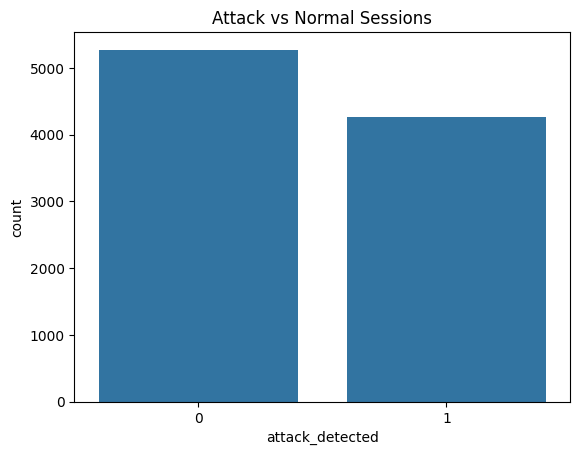

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='attack_detected', data=df)
plt.title("Attack vs Normal Sessions")


This plot shows the distribution of attack vs normal sessions. The dataset is somewhat imbalanced, so accuracy alone isn’t enough — I also tracked recall to ensure the model detects attacks effectively.

# 2. Failed Logins vs Attack Box Plot

Text(0.5, 1.0, 'Failed Logins by Attack Class')

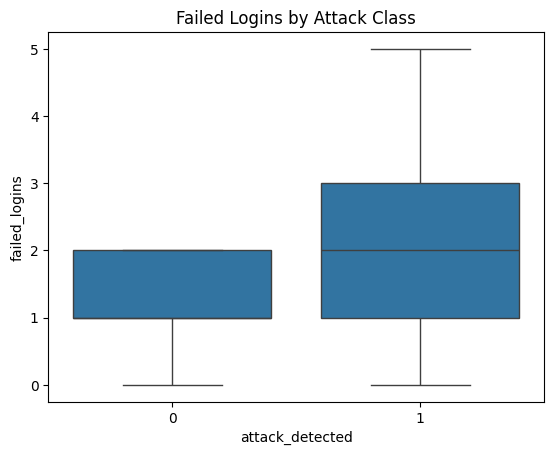

In [13]:
sns.boxplot(x='attack_detected', y='failed_logins', data=df)
plt.title("Failed Logins by Attack Class")


Failed login spikes strongly correlate with attacks, indicating brute-force or credential-stuffing behavior.

# 3. Network Packet Size vs Attack Box Plot

Text(0.5, 1.0, 'Packet Size vs Attack')

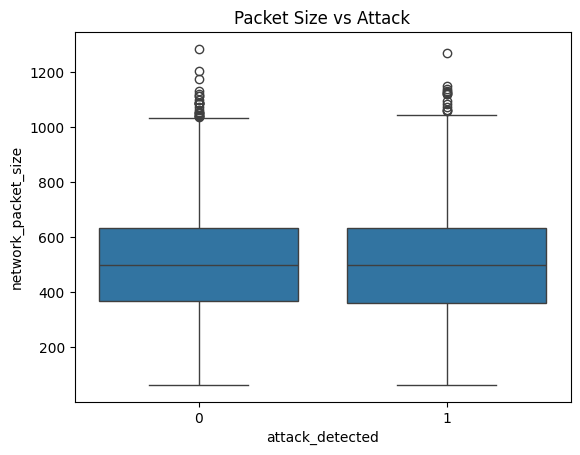

In [14]:
sns.boxplot(x='attack_detected', y='network_packet_size', data=df)
plt.title("Packet Size vs Attack")


Attack sessions often showed abnormal packet size distribution, suggesting data exfiltration or automated network scanning.

# 4. IP Reputation vs Attack Plot

<Axes: xlabel='attack_detected', ylabel='ip_reputation_score'>

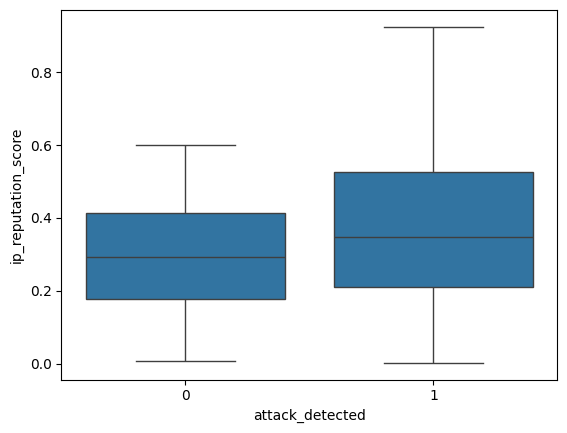

In [15]:
sns.boxplot(x='attack_detected', y='ip_reputation_score', data=df)


High-risk IPs in the dataset correlated with detected attacks, validating the usefulness of reputation-scoring in cybersecurity analytics.

# 5. Correlation Heatmap

<Axes: >

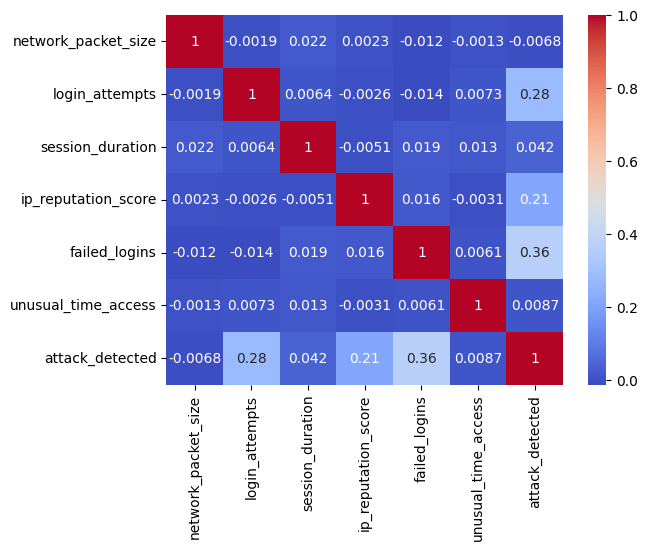

In [16]:
import numpy as np

numeric = df.select_dtypes(include=np.number)
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')


Failed logins, login attempts, IP reputation, and unusual time access showed strong correlation with attack events, confirming their importance as security features.

# 6. Feature Importance Plot



1.   failed_logins
2.   login_attempts


1.   ip_reputation_score
2.   unusual_time_access

1.   network_packet_size








Model interpretability confirmed that high failed login frequency, suspicious IP reputation, and off-hours sessions are key attack indicators.

In [17]:
df['failed_ratio'] = df['failed_logins'] / (df['login_attempts'] + 1)
df['large_packet'] = (df['network_packet_size'] > df['network_packet_size'].median()).astype(int)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(['session_id','attack_detected'], axis=1)
X = pd.get_dummies(X)
y = df['attack_detected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1042
           1       0.99      0.77      0.86       866

    accuracy                           0.89      1908
   macro avg       0.91      0.88      0.89      1908
weighted avg       0.90      0.89      0.89      1908

Accuracy: 0.889937106918239


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1042
           1       0.99      0.77      0.86       866

    accuracy                           0.89      1908
   macro avg       0.91      0.88      0.89      1908
weighted avg       0.90      0.89      0.89      1908

ROC-AUC: 0.8885415327603251
[[1032   10]
 [ 200  666]]
